In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set_palette('colorblind')
sns.set_context('talk')
sns.set_style('darkgrid')

In [2]:
bro = pd.read_csv('../../data/bronze.csv', index_col=0)
ati = pd.read_csv('../../data/atium.csv', index_col=0)
bro.head(5)

,KIC,n,l,Freq,e_Freq,E_Freq,Amp,e_Amp,E_Amp,Width,...,source,f,f_e,g,g_e,A,A_e,H,H_e,flag
0,1435467,11,1,889.25,0.47,0.53,NaN,NaN,NaN,NaN,...,L,890.192202,0.339219,2.470547,0.295254,2.343982,0.151824,1.413654,0.220290,NaN
1,1435467,11,2,920.04,1.82,1.99,NaN,NaN,NaN,NaN,...,L,921.945957,1.156754,2.543673,0.279611,1.601747,0.176437,0.642273,0.154858,NaN
2,1435467,12,0,928.22,0.94,0.71,2.39,0.14,0.13,4.79,...,L,927.787406,0.531365,2.561105,0.275386,1.539569,0.175291,0.586035,0.133254,NaN
3,1435467,12,1,957.04,0.50,0.46,NaN,NaN,NaN,NaN,...,L,957.508880,0.307417,2.629178,0.260519,2.547766,0.134400,1.570424,0.203176,NaN
4,1435467,12,2,989.14,1.24,1.30,NaN,NaN,NaN,NaN,...,L,989.706674,0.520035,2.706434,0.244099,2.212561,0.167521,1.149231,0.206286,NaN


In [3]:
ati.columns

Index(['KIC', 'Teff', 'age', 'dnu', 'eTeff', 'ednu', 'efeh', 'enumax', 'feh',
       'loage', 'lomodlogg', 'lomodmass', 'lomodrad', 'modlogg', 'modmass',
       'modrad', 'numax', 'source', 'upage', 'upmodlogg', 'upmodmass',
       'upmodrad', 'G', 'bprp', 'hrclass', 'nus*', 'l_nus*', 'u_nus*', 'cosi',
       'l_cosi', 'u_cosi', 'i', 'l_i', 'u_i', 'nus', 'l_nus', 'u_nus', 'P',
       'l_P', 'u_P', 'vsini', 'l_vsini', 'u_vsini', 'fit_numax', 'efit_numax',
       'fit_d01', 'efit_d01', 'fit_d02', 'efit_d02', 'fit_epsilon',
       'efit_epsilon', 'V1', 'eV1', 'V2', 'eV2', 'rhat_flag', 'corner_flag',
       'neff_xsplit', 'neff_cosi', 'neff_split', 'neff_i', 'ebprp'],
      dtype='object')

## I'm going to make a bunch of plots analogous to Lund et al. 2017

### Mode Amplitudes:

In [4]:
stars = ati.KIC.values

In [6]:
tindex = (ati.Teff - ati.Teff.min())
tindex /= tindex.max()

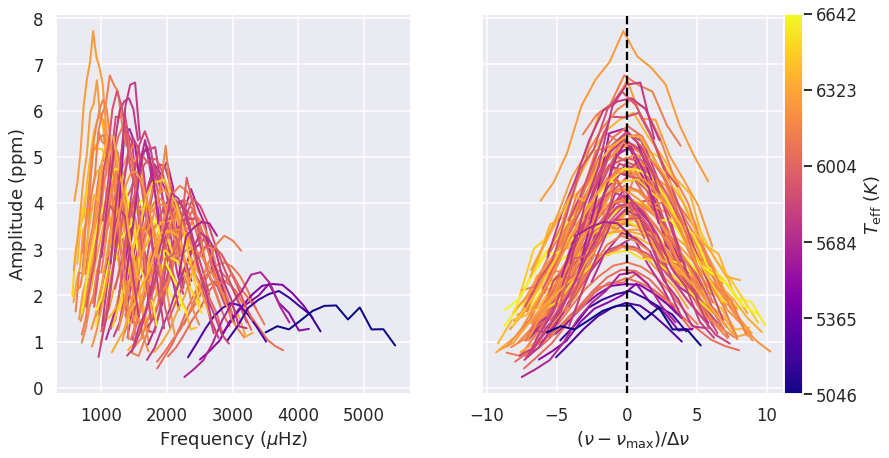

In [7]:
fig, ax = plt.subplots(1,2, sharey = True, figsize=(14,7))
ax[0].set_ylabel(r'Amplitude ($\rm ppm$)')
ax[0].set_xlabel(r'Frequency ($\mu \rm Hz$)')
ax[1].set_xlabel(r'$(\nu - \nu_{\rm max})/\Delta\nu$')

for idx, star in enumerate(stars):
    sel = (bro.KIC == str(star)) & (bro.l == 0)
    ats = ati.KIC == star
    ax[0].plot(bro[sel].f, bro[sel].A, 
               lw=2, c= plt.cm.plasma(tindex[idx]))
    ax[1].plot((bro[sel].f - ati[ats].fit_numax.values)/ati[ats].dnu.values, bro[sel].A, 
               lw=2, c = plt.cm.plasma(tindex[idx]))
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='plasma'), ax=ax[1], label = r'$T_{\rm eff}$ ($K$)', pad=0.)
ticklabels = [f'{(ati.Teff.max() - ati.Teff.min()) * v + ati.Teff.min():.0f}' for v in [0, 0.2, 0.4, 0.6, 0.8, 1.0]]
cbar.ax.set_yticklabels(ticklabels)

ax[1].axvline(0., ls='--', c='k')

### Linewidth plot

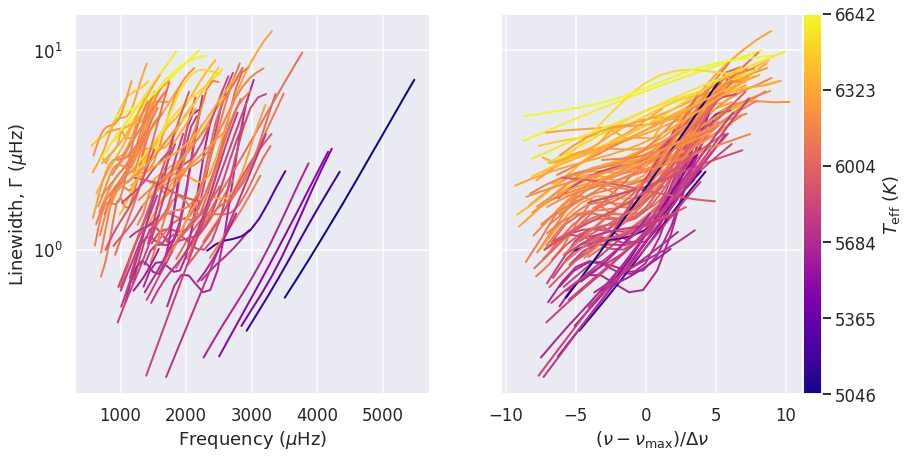

In [16]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(14,7))
ax[0].set_ylabel(r'Linewidth, $\Gamma$ ($\mu\rm Hz$)')
ax[0].set_xlabel(r'Frequency ($\mu \rm Hz$)')
ax[1].set_xlabel(r'$(\nu - \nu_{\rm max})/\Delta\nu$')

for idx, star in enumerate(stars):
    sel = (bro.KIC == str(star)) & (bro.l == 0)
    ats = ati.KIC == star
    ax[0].plot(bro[sel].f, bro[sel].g, 
               lw=2, c=plt.cm.plasma(tindex[idx]))    
    ax[1].plot((bro[sel].f - ati[ats].fit_numax.values)/ati[ats].dnu.values, bro[sel].g, 
               lw=2,c=plt.cm.plasma(tindex[idx]))
    
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='plasma'), ax=ax[1], label = r'$T_{\rm eff}$ ($K$)', pad=0.)
ticklabels = [f'{(ati.Teff.max() - ati.Teff.min()) * v + ati.Teff.min():.0f}' for v in [0, 0.2, 0.4, 0.6, 0.8, 1.0]]
cbar.ax.set_yticklabels(ticklabels)
ax[0].set_yscale('log')
ax[1].set_yscale('log')